# Analysing Time Series

* Nice time-series example!
* Further reading: https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

## Trend/Seasonality/Noise

- In this exercise, we will decompose a time series.

### 1. Import the dataset as a DataFrame. 
- Inspect the size of the data and the column types and missing values (if present).


In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#this gives us 12 years of passenger data
df = sns.load_dataset('flights')
df.head() 

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [2]:
df.shape

(144, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [4]:
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### 2. Plot the time series! A nice line plot will give us some good information.

To plot the time series with a proper x-axis, combine the ‘year’ and ‘month’ columns to a new column:

- convert both columns to strings using the .astype( ) method.
- concatenate the column values with a space in between, e.g. ‘January 1961’
- use pd.to_datetime( ) to convert the resulting data
- set the index to the new column

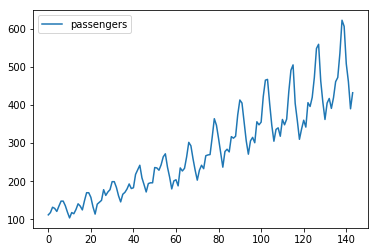

In [5]:
df.plot(y='passengers')
plt.show()

#### General trend is that there's an upward trajectory - there's also seasonality: some months are much busier than others!

In [6]:
# we get an error here - series needs to be strings!
df['date'] = df['month'] + ' ' + df['year']

TypeError: Series cannot perform the operation +

In [7]:
df['date'] = df['month'].astype(str) + ' ' + df['year'].astype(str)

In [8]:
df.head(1)

,year,month,passengers,date
0,1949,January,112,January 1949


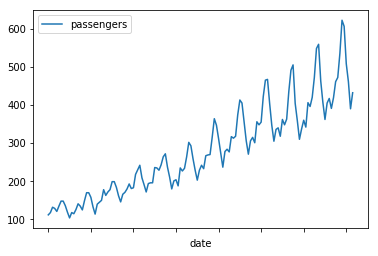

In [9]:
df.plot(x='date', y='passengers') # still doesn't give us a date

- Let's make a timestamp!

In [10]:
df['ts'] = pd.to_datetime(df['date'])

df.head(3)

,year,month,passengers,date,ts
0,1949,January,112,January 1949,1949-01-01
1,1949,February,118,February 1949,1949-02-01
2,1949,March,132,March 1949,1949-03-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
date          144 non-null object
ts            144 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2), object(1)
memory usage: 5.1+ KB


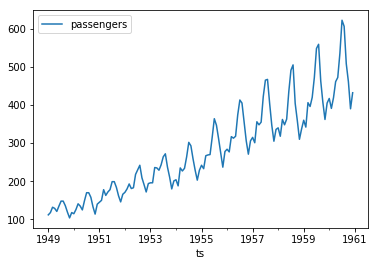

In [12]:
df.plot(x='ts', y='passengers')

#### We have plotted the dataframe pretty much as we want!
- Now we will concentrate on plotting the variation between the months!

### 3. We see a trend, seasonality and a residual component. Now we will attempt to separate these components
Let’s try a few simple transformations first:
- use the .diff() method to calculate the month-to-month difference
- use the .pct_change() method to calculate the percentage of change
- use the .rolling(12).mean() method to observe non-seasonal patterns

Plot all three resulting parts and compare them.

In [13]:
df['diff'] = df['passengers'].diff()

df.head()

,year,month,passengers,date,ts,diff
0,1949,January,112,January 1949,1949-01-01,NaN
1,1949,February,118,February 1949,1949-02-01,6.0
2,1949,March,132,March 1949,1949-03-01,14.0
3,1949,April,129,April 1949,1949-04-01,-3.0
4,1949,May,121,May 1949,1949-05-01,-8.0


#### .diff( ) Calculates the absolute difference between the current point and the point before it!
- Now lets plot the difference!

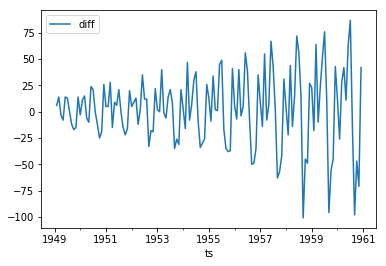

In [14]:
df.plot(x='ts', y='diff') 

#### The .diff method has essentially taken the trend out of our data!

- But the **seasonality remains**!

- The **volatility - aka the variance** - is now apparent.

#### Now we would like to do something about the volatility:

In [15]:
df['pct'] = df['passengers'].pct_change()

df.head() # this now gives us the percentage change month to month!

,year,month,passengers,date,ts,diff,pct
0,1949,January,112,January 1949,1949-01-01,NaN,NaN
1,1949,February,118,February 1949,1949-02-01,6.0,0.053571
2,1949,March,132,March 1949,1949-03-01,14.0,0.118644
3,1949,April,129,April 1949,1949-04-01,-3.0,-0.022727
4,1949,May,121,May 1949,1949-05-01,-8.0,-0.062016


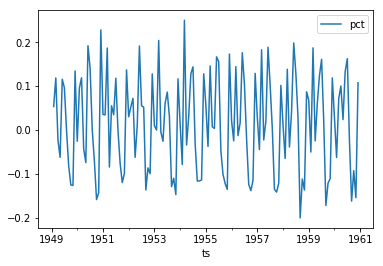

In [16]:
df.plot(x='ts', y='pct') 

#### This only gives us the seasonality - we have taken out the trend and the change in variance!

- The **seasonality is now incredibly clear**.

#### pct_change( ) removes trend and volatility!

In [17]:
df['rolling_mean'] = df['passengers'].rolling(12).mean()

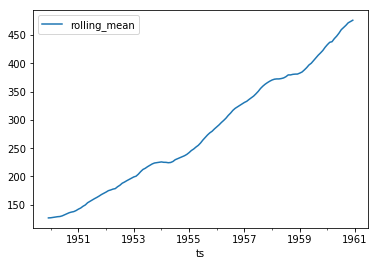

In [18]:
df.plot(x='ts', y='rolling_mean')

#### Rolling mean only gives us the trend - we have removed both the volatility and the seasonality!
- As we can see, it goes up and up year on year.

### 4. Statsmodels - seasonal decompose
- The statsmodels package contains a function that decomposes the time series completely. Make sure you understand the output:

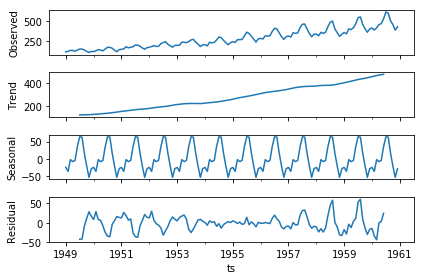

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

sdr = seasonal_decompose(df.set_index('ts')['passengers'], model='additive')
sdr.plot()
None

- If you were to plot random data, it would all be random.

### 5. Examining seaonality further

#### As we saw before, pct_change( ) removes trend and volatility, leaving only seasonality
- There is still a random noise component in here though, how do we eliminate that?

- Create a bar plot that displays the mean passenger number grouped by month.

In [19]:
df.groupby('month')['pct'].mean()

month
January      0.025745
February    -0.010453
March        0.151735
April       -0.020056
May          0.008571
June         0.142526
July         0.121226
August       0.001147
September   -0.125067
October     -0.120018
November    -0.124927
December     0.132474
Name: pct, dtype: float64

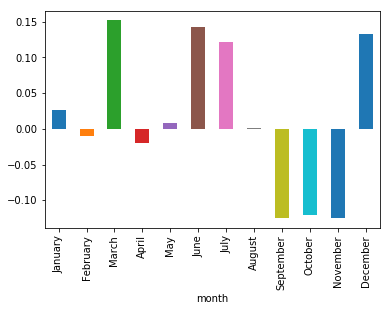

In [20]:
months_avg = df.groupby('month')['pct'].mean()
months_avg.plot.bar()

- This still compares to the month before, bare that in mind

### 6. Normalising the data
- To obtain data without the seasonal component, we will normalize the data by the mean monthly numbers. To avoid that the trend (and the according increase in variance) bias our result, we use the percentage change:

In [21]:
df['pct'].values[:10] # raw numerical data with no index attached

array([        nan,  0.05357143,  0.11864407, -0.02272727, -0.0620155 ,
        0.11570248,  0.0962963 ,  0.        , -0.08108108, -0.125     ])

In [22]:
mmlist = list(months_avg.values)*12
mmlist[:10]

[0.02574476340715519,
 -0.010452654097210301,
 0.1517353396486729,
 -0.020055967978582317,
 0.00857145791964109,
 0.14252620231139534,
 0.12122643408937049,
 0.0011471413067847547,
 -0.1250669716829135,
 -0.12001837682782779]

In [23]:
len(mmlist)

144

- Divide the precentage change by the monthly means and create a new column from the result. Plot the de-sesonalized timeline.

In [24]:
div = df['pct'].values / mmlist
div.shape

(144,)

In [25]:
df['normalised_pct'] = df['pct'].values / mmlist
df.head()

,year,month,passengers,date,ts,diff,pct,rolling_mean,normalised_pct
0,1949,January,112,January 1949,1949-01-01,NaN,NaN,NaN,NaN
1,1949,February,118,February 1949,1949-02-01,6.0,0.053571,NaN,-5.125151
2,1949,March,132,March 1949,1949-03-01,14.0,0.118644,NaN,0.781915
3,1949,April,129,April 1949,1949-04-01,-3.0,-0.022727,NaN,1.133193
4,1949,May,121,May 1949,1949-05-01,-8.0,-0.062016,NaN,-7.235117


#### We want to divide the pct change by the average of the month

- because we want to flatten the previous graph 

What we want to see is whether the value of a given month is higher or lower compared to the average of that month!

#### Is it a busy december compared to other decembers?

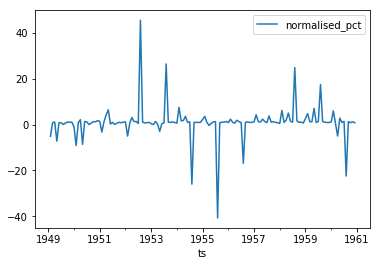

In [26]:
df.plot(x = 'ts', y = 'normalised_pct')

- This is the information that is left 

### 7. To use the seasonality in a linear model, use one-hot-encoding on the ‘month’ column:

- use pd.get_dummies( ) to calculate a one-hot-encoded DataFrame
- use pd.concat([df1, df2], axis=1) to concatenate two DataFrames horizontally

**Hint**: Remove a rather average redundant month from the features. Otherwise, use use a regularized model.
